In [1]:
"""
このスクリプトはscikit-learnの公式にあるコンフュージョンマトリクスのexample
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

アイリスデータセットをSVMで学習→テストし、結果を可視化
"""

'\nこのスクリプトはscikit-learnの公式にあるコンフュージョンマトリクスのexample\nhttp://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html\n'

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# import some data to play with
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target
#print(X, X.shape)
#print(y, y.shape)

In [4]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#print(X_test, X_test.shape)
#print(y_test, y_test.shape)

In [13]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
print (y_pred)

[2 1 0 2 0 2 0 2 2 1 2 2 1 2 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [6]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


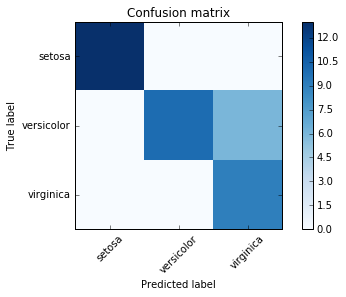

In [7]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.62  0.38]
 [ 0.    0.    1.  ]]


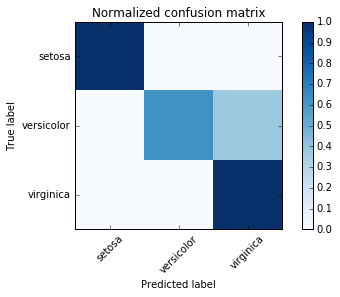

In [8]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [14]:
# SVCのデフォルトはone-vs-one
# one-vs-restも試してみる
estimator = svm.SVC(kernel='linear', C=0.01)
classifier_ovr = OneVsRestClassifier(estimator)
y_pred = classifier_ovr.fit(X_train, y_train).predict(X_test)
print (y_pred)

[2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 0 0 2 0 0 2 0 0 2 2 0 2 2 2 0
 2]


Confusion matrix, without normalization
[[13  0  0]
 [ 1  0 15]
 [ 0  0  9]]


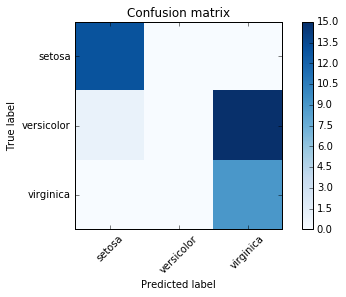

In [16]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)